# Project: Property Loss($) Prediction Due to Fire Incidents


## Data Dictionary
Here is the data dictionary for BASIC (see p. 163 of document, p. 167 of the PDF). Your goal is to predict the loss as a function of the other variables that are available to you.
* https://www.usfa.fema.gov/downloads/pdf/nfirs/NFIRS_Spec_2015.pdf





##Importing Required Modules

In [ ]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# regression error metrics - scikit-learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# regression error metrics - scikit-learn
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.eval_measures import meanabs

# Some tests/statistics required for validating assumptions
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import module
import numpy as np 
import pandas as pd

# for load data 
from sklearn.datasets import load_boston

# stats model
import statsmodels.api as sm

# minmax scalar
from sklearn.preprocessing import MinMaxScaler

# regression
from sklearn.linear_model import LinearRegression

# Ridge
from sklearn.linear_model import Ridge, RidgeCV

#Lasso
from sklearn.linear_model import Lasso, LassoCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the dataset

In [ ]:
# https://drive.google.com/file/d/1MxgmttUPTvDp9jns1VtAe978d0iiYiXT/view?usp=sharing
!gdown --id 1MxgmttUPTvDp9jns1VtAe978d0iiYiXT # 500 MB file - whoa!

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1MxgmttUPTvDp9jns1VtAe978d0iiYiXT
To: /content/NFIRS2014.csv
100% 471M/471M [00:03<00:00, 157MB/s]


In [ ]:
df = pd.read_csv('NFIRS2014.csv')
df.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,4,6,14,15,16,17,18,19,37,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116746 entries, 0 to 2116745
Data columns (total 41 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   STATE       object 
 2   FDID        object 
 3   INC_DATE    object 
 4   INC_NO      object 
 5   EXP_NO      int64  
 6   DEPT_STA    object 
 7   INC_TYPE    int64  
 8   ADD_WILD    object 
 9   AID         object 
 10  ALARM       object 
 11  ARRIVAL     object 
 12  INC_CONT    float64
 13  LU_CLEAR    object 
 14  SHIFT       object 
 15  ALARMS      object 
 16  DISTRICT    object 
 17  ACT_TAK1    object 
 18  ACT_TAK2    object 
 19  ACT_TAK3    object 
 20  APP_MOD     object 
 21  SUP_APP     int64  
 22  EMS_APP     int64  
 23  OTH_APP     int64  
 24  SUP_PER     int64  
 25  EMS_PER     int64  
 26  OTH_PER     int64  
 27  RESOU_AID   object 
 28  PROP_LOSS   float64
 29  CONT_LOSS   float64
 30  PROP_VAL    float64
 31  CONT_VAL    float64
 32  FF_DEATH    float64
 33  OTH_DEA

In [ ]:
# look at the first 10 rows
df.head(n=10)

,Unnamed: 0,STATE,FDID,INC_DATE,INC_NO,EXP_NO,DEPT_STA,INC_TYPE,ADD_WILD,AID,...,CONT_VAL,FF_DEATH,OTH_DEATH,FF_INJ,OTH_INJ,DET_ALERT,HAZ_REL,MIXED_USE,PROP_USE,CENSUS
0,1,AK,11100,2014-01-02,222,0,3,463,N,N,...,NaN,0.0,NaN,0.0,NaN,NaN,N,00,961,NaN
1,2,AK,11100,2014-01-05,598,0,3,561,N,N,...,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,900,NaN
2,3,AK,11100,2014-01-09,1030,0,3,114,N,N,...,NaN,0.0,NaN,0.0,NaN,U,N,NN,419,NaN
3,4,AK,11100,2014-01-10,1212,0,3,561,N,N,...,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,419,NaN
4,5,AK,11100,2014-01-11,1280,0,3,138,N,N,...,0.0,0.0,NaN,0.0,NaN,NaN,N,60,919,NaN
5,6,AK,11100,2014-01-12,1392,0,3,142,N,N,...,20000.0,0.0,NaN,0.0,NaN,NaN,N,NN,669,NaN
6,7,AK,11100,2014-01-13,1559,0,3,561,N,N,...,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,938,NaN
7,8,AK,11100,2014-01-13,1564,0,3,561,N,N,...,NaN,0.0,NaN,0.0,NaN,NaN,N,60,938,NaN
8,9,AK,11100,2014-01-16,1943,0,3,411,N,N,...,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,974,NaN
9,10,AK,11100,2014-01-17,2129,0,1,113,N,N,...,NaN,0.0,NaN,0.0,NaN,2,N,NN,429,NaN


In [ ]:
# shape
df.shape

(2116746, 41)

##Exploratory Data Analysis

###Missing Values per Column

In [ ]:
df.isnull().sum()

Unnamed: 0          0
STATE             329
FDID                0
INC_DATE            0
INC_NO              0
EXP_NO              0
DEPT_STA       557513
INC_TYPE            0
ADD_WILD            0
AID                 0
ALARM               0
ARRIVAL             0
INC_CONT      1612496
LU_CLEAR          114
SHIFT          864553
ALARMS         755315
DISTRICT       893634
ACT_TAK1            3
ACT_TAK2      1437009
ACT_TAK3      1858837
APP_MOD             0
SUP_APP             0
EMS_APP             0
OTH_APP             0
SUP_PER             0
EMS_PER             0
OTH_PER             0
RESOU_AID           0
PROP_LOSS      950366
CONT_LOSS      963294
PROP_VAL      1277801
CONT_VAL      1305971
FF_DEATH        26499
OTH_DEATH     2108003
FF_INJ          26499
OTH_INJ       2108003
DET_ALERT     1468020
HAZ_REL       1606682
MIXED_USE     1754158
PROP_USE       174726
CENSUS        1739681
dtype: int64

###Month with the most Fire Incidents

In [ ]:
df['INC_DATE']=pd.to_datetime(df['INC_DATE'])

In [ ]:
df['Month']=df['INC_DATE'].dt.month

In [ ]:
df['Year']=df['INC_DATE'].dt.year

In [ ]:
df['Year'].unique()

array([2014])

In [ ]:
df_most_fires=df[(df['INC_TYPE']>=100) & (df['INC_TYPE']<175)]

In [ ]:
df_most_fires['Month'].value_counts(ascending=False)


3     116588
4     115041
1     111568
7      96657
5      95708
11     90109
2      85989
6      82657
8      81614
10     74988
9      73016
12     72558
Name: Month, dtype: int64

* March has most number of fires

###Day with the most Fire Incidents

In [ ]:
df_most_fires['INC_DATE'].value_counts(ascending=False)

2014-07-04    6968
2014-03-15    6143
2014-04-12    5839
2014-07-05    5613
2014-04-11    5333
              ... 
2014-10-16    2046
2014-12-28    2043
2014-10-14    2037
2014-12-27    1980
2014-12-23    1922
Name: INC_DATE, Length: 365, dtype: int64

* July 4th 2014 had most number of fires.





###State with the most property loss($)

In [ ]:
df.groupby('STATE').PROP_LOSS.sum().sort_values(ascending=False)

STATE
CA    839716885.0
TX    517798452.0
KY    497602050.0
FL    399988908.0
MI    385733330.0
IL    315622451.0
GA    286015916.0
OH    249603029.0
TN    206991064.0
WI    200223314.0
MA    200183589.0
WA    193980269.0
VA    187532875.0
NC    183656059.0
MN    170988037.0
AR    141774637.0
LA    139933855.0
SC    131919327.0
MS    130466925.0
MD    129775967.0
PA    114432744.0
IA    107669696.0
OR     99534936.0
MO     97007887.0
OK     96187504.0
NY     91536732.0
CT     90702164.0
NJ     90188742.0
KS     85692832.0
WV     84619213.0
NM     59686091.0
AZ     58583790.0
AL     57052431.0
CO     56018342.0
AK     52470529.0
UT     36039167.0
ID     31145057.0
NE     30347577.0
MT     29537161.0
ME     29032039.0
ND     24564192.0
NH     24334552.0
NV     23329260.0
HI     19645221.0
VT     17138357.0
IN     15440681.0
SD     14211795.0
RI     12657936.0
WY      6306986.0
DE      5889224.0
DC      1987530.0
Name: PROP_LOSS, dtype: float64

* California had the most property loss

### Keeping rows where Property Loss is greater than 1000.

In [ ]:
df2=df[df['PROP_LOSS']>1000]

In [ ]:
df2.shape

(169362, 43)

In [ ]:
df2['PROP_LOSS'].describe()

count    1.693620e+05
mean     4.151527e+04
std      1.107988e+06
min      1.001000e+03
25%      3.500000e+03
50%      8.987500e+03
75%      2.500000e+04
max      4.000000e+08
Name: PROP_LOSS, dtype: float64

* There are 169362 rows left after removing rows where property loss is greater than 1000 and 1,947,384 rows have been removed.

### Keeping rows where Property Value is greater than 1000. 

In [ ]:
df3=df2[df2['PROP_VAL']>1000]

In [ ]:
df3.shape

(122729, 43)

In [ ]:
df3['PROP_VAL'].describe()

count    1.227290e+05
mean     3.261011e+05
std      7.079028e+06
min      1.001000e+03
25%      5.250000e+03
50%      2.791600e+04
75%      1.000000e+05
max      1.000000e+09
Name: PROP_VAL, dtype: float64

* There are 122729 rows left after removing rows where prop_val is greater than 1000 and 46,633 rows have been removed.

###Converting `df['CENSUS']` column to numeric.**bold text**

In [ ]:
df3['CENSUS'].value_counts()

1         320
0.0       187
2         171
000000    150
01        130
         ... 
111402      1
1179        1
1234        1
1405        1
408000      1
Name: CENSUS, Length: 6952, dtype: int64

In [ ]:
df3['CENSUS'].unique()

array([nan, '00050', 'F614', ..., '540990', '541215', 541215.0],
      dtype=object)

In [ ]:
df4=df3.copy()
df4.shape

(122729, 43)

In [ ]:
df4=df4[pd.to_numeric(df4['CENSUS'], errors='coerce').notnull()]

In [ ]:
df4['CENSUS']=pd.to_numeric(df4['CENSUS'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4.shape

(22822, 43)

###Keeping rows where `df['CENSUS`] is greater than 0.
We only want to work with data that we know where it is.

In [ ]:
df5=df4[df4['CENSUS']>0]

In [ ]:
df5.shape

(22351, 43)

###Scatterplot of `x='PROP_VAL'` and `y='PROP_LOSS'`. 


Text(0.5, 1.0, 'PROP_VAL vs PROP_LOSS')

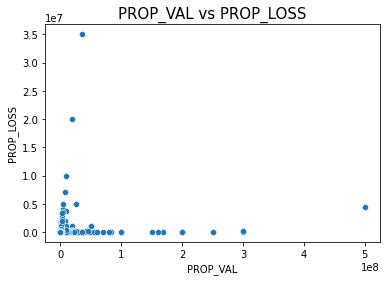

In [ ]:
p=sns.scatterplot(x=df5['PROP_VAL'],y=df5['PROP_LOSS'],markers=True)
p.set_xlabel("PROP_VAL", fontsize = 10)
p.set_ylabel("PROP_LOSS", fontsize = 10)
p.set_title("PROP_VAL vs PROP_LOSS",fontsize=15)


* As the property valuation increases, the increase in property loss is not that high because the slope is very low and most of the times it is constant.

### Average time taken for fire fighters to arrive to the location in each state.

In [ ]:
#Converting to date time
df['ALARM_1']=pd.to_datetime(df['ALARM'])
df['ARRIVAL_1']=pd.to_datetime(df['ARRIVAL'])

In [ ]:
#Extracting hours from the column
df['Alarm_hour']=df['ALARM_1'].dt.hour
df['Alarm_min']=df['ALARM_1'].dt.minute
df['Arrival_hour']=df['ARRIVAL_1'].dt.hour
df['Arrival_min']=df['ARRIVAL_1'].dt.minute

In [ ]:
df_times=df[['Alarm_hour','Alarm_min','Arrival_hour','Arrival_min']]

In [ ]:
conditions=[(df_times['Alarm_hour']) == (df_times['Arrival_hour']),
            (df_times['Alarm_hour']) != (df_times['Arrival_hour'])]

In [ ]:
values=['1','0']

In [ ]:
df_times['Same']=np.select(conditions,values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_times.head()

,Alarm_hour,Alarm_min,Arrival_hour,Arrival_min,Same
0,17,20,17,29,1
1,14,30,14,55,1
2,13,50,13,54,1
3,20,34,21,46,0
4,11,48,11,56,1


In [ ]:
df_times['Same'].value_counts()

1    1854889
0     261857
Name: Same, dtype: int64

In [ ]:
conditions=[((df_times['Arrival_hour'])-(df_times['Alarm_hour'])) == 0,
            (df_times['Arrival_hour'])-(df_times['Alarm_hour']) > 0]

In [ ]:
values=[df_times['Arrival_min']-df_times['Alarm_min'],60-df_times['Alarm_min']+df_times['Arrival_min']]

In [ ]:
df_times['Time_for _arrival']=np.select(conditions,values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_times.head()

,Alarm_hour,Alarm_min,Arrival_hour,Arrival_min,Same,Time_for _arrival
0,17,20,17,29,1,9
1,14,30,14,55,1,25
2,13,50,13,54,1,4
3,20,34,21,46,0,72
4,11,48,11,56,1,8


In [ ]:
df_times['State']=df['STATE'].to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_times_1=df_times.groupby('State').mean()['Time_for _arrival']

In [ ]:
df_times_1.shape

(51,)

In [ ]:
df_times_1=pd.DataFrame(df_times_1)
df_times_1['State'] = df_times_1.index
df_times_1.sort_values(by=['Time_for _arrival'],inplace=True,ascending=True)

In [ ]:
df_times_1.head()

,Time_for _arrival,State
State,,
MA,5.240750,MA
NY,5.506517,NY
DC,5.614682,DC
NJ,5.935607,NJ
RI,6.068241,RI


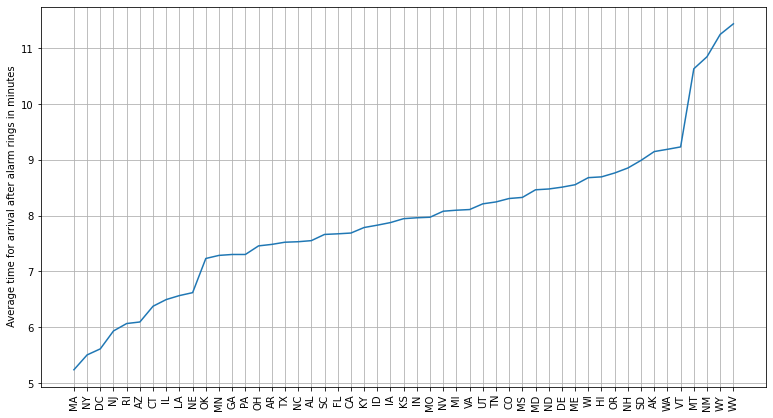

In [ ]:
plt.figure(figsize=(13, 7))
plt.plot(df_times_1['State'],df_times_1['Time_for _arrival'],)
plt.xticks(df_times_1['State'],rotation=90)
plt.ylabel(' Average time for arrival after alarm rings in minutes')
plt.grid()
plt.show()

* Here, fire fighters will arrive faster in MA , which is approx 5.24 minutes in average and WV fire fighters take longest time, which is 11.43 minutes.

### Plot between hours ad number of incidents occuured in that particular hour

In [ ]:
#Number of incidents occured for every hour
df['Alarm_hour'].value_counts(ascending=False)

17    143853
16    142059
15    141088
14    136762
18    136455
13    129265
19    127537
20    119156
12    117909
11    106235
21    101935
10     94558
9      82273
22     80812
8      72435
23     62373
7      58299
0      50459
6      42739
1      40346
2      35504
5      32408
3      32064
4      30222
Name: Alarm_hour, dtype: int64

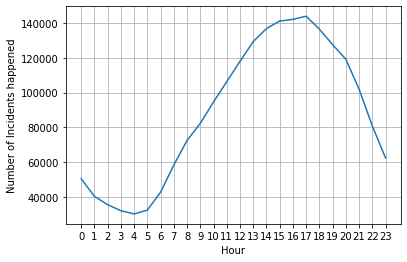

In [ ]:
hours=[hour for hour,fd in df.groupby('Alarm_hour')]
plt.plot(hours,df['Alarm_hour'].value_counts().sort_index(ascending=True))
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Incidents happened')
plt.grid()
plt.show()

* It can be seen that between 3 pm and 5 pm , most number of incidents have occured.

### Number of Incidents per hour for each state

In [ ]:
df_1=df.groupby('STATE').count()['ALARM']

In [ ]:
df_2=pd.DataFrame(df_1)

In [ ]:
df_2.sort_values(by=['ALARM'],inplace=True)

In [ ]:
df_2.head()

,ALARM
STATE,
WY,2651
DC,2738
ND,3361
SD,4075
HI,5279


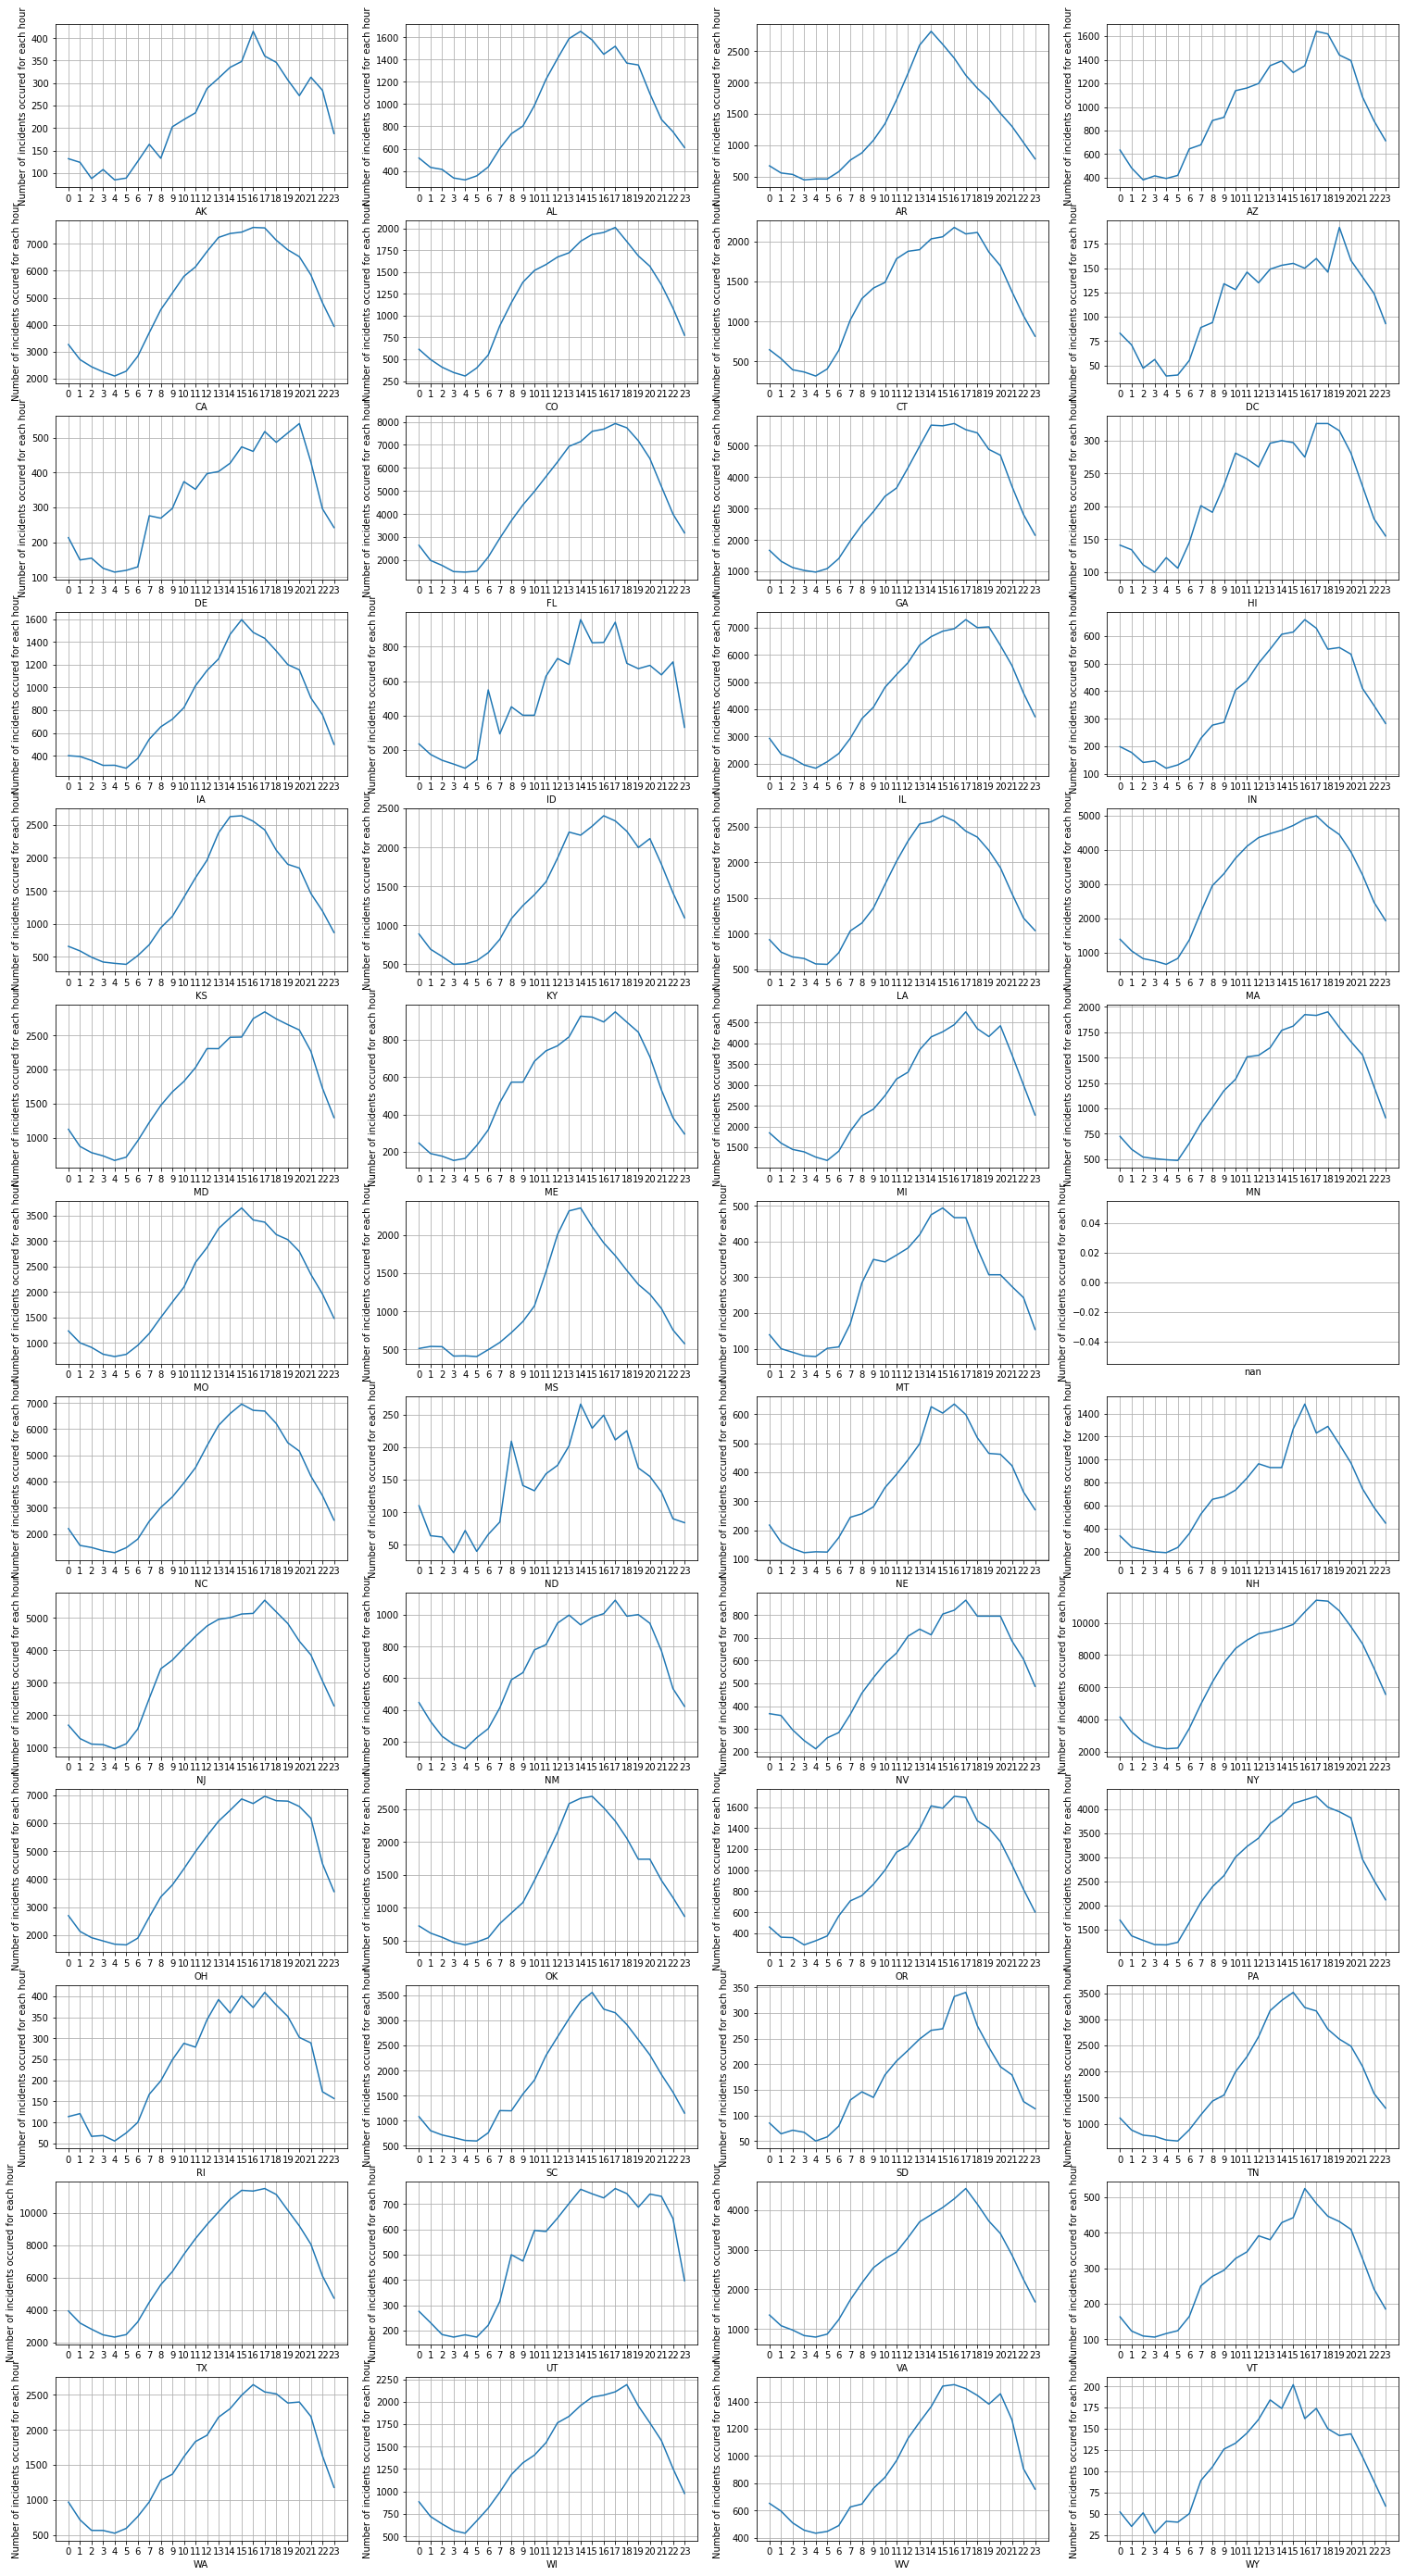

In [ ]:
plt.figure(figsize=(26, 50))
c=1
for i in df['STATE'].unique():
  ax=plt.subplot(13,4,c)
  c=c+1
  df2=df[df['STATE']==i]
  hours=[hour for hour,fd in df2.groupby('Alarm_hour')]
  ax.plot(hours,df2['Alarm_hour'].value_counts().sort_index(ascending=True))
  plt.xlabel(i)
  plt.ylabel("Number of incidents occured for each hour")
  plt.xticks(hours)
  ax.grid()
  

* So, if we see the graph of all the incidents, most of them happened from 4pm to 6pm.

### Creating a pivot table for loss in each state and each type of loss with sum of all the losses in each cell.



In [ ]:
df5['PROP_LOSS'].describe()

count    2.235100e+04
mean     3.502946e+04
std      3.057995e+05
min      1.001000e+03
25%      3.000000e+03
50%      8.000000e+03
75%      2.340000e+04
max      3.500000e+07
Name: PROP_LOSS, dtype: float64

Creating a new column according to the quartile range of property loss

1- Below Q1 (minute loss)

2- Above Q1 and Below Q2(medium)

3- Above Q2 and below Q3(medium)

4- Above Q3(huge loss)

In [ ]:
conditions=[(df5['PROP_LOSS']>1000) & (df5['PROP_LOSS']<=3000),
            (df5['PROP_LOSS']>3000) & (df5['PROP_LOSS']<=8000),
            (df5['PROP_LOSS']>8000) & (df5['PROP_LOSS']<=23400),
            (df5['PROP_LOSS']>23400)]
values=['1','2','3','4']
df5['LOSS_RANK']=np.select(conditions,values)

In [ ]:
# Count for each type of loss
df5['LOSS_RANK'].value_counts(ascending=False)

1    5833
2    5741
4    5588
3    5189
Name: LOSS_RANK, dtype: int64

In [ ]:
Table_total_loss=pd.pivot_table(df5,index='STATE',values='PROP_LOSS',columns=['LOSS_RANK'],aggfunc=np.sum)

In [ ]:
Table_total_loss.head()

LOSS_RANK,1,2,3,4
STATE,,,,
AK,26326.0,102000.0,266030.0,3089870.0
AL,24700.0,92000.0,179500.0,1212000.0
AR,69050.0,161363.0,488000.0,1970000.0
AZ,73623.0,93000.0,196664.0,2410000.0
CA,722300.0,1643800.0,3517340.0,37876352.0


In [ ]:
#Converting to data frame
Table_total_loss=pd.DataFrame(Table_total_loss)

In [ ]:
# adding sum column to the dataframe, which consists of total loss in that particular state and sorting the dataframe in descending order.
Table_total_loss['SUM']=Table_total_loss['1']+Table_total_loss['2']+Table_total_loss['3']+Table_total_loss['4']
Table_total_loss.sort_values(by=['SUM'],inplace=True,ascending=False)

In [ ]:
Table_total_loss.head()

LOSS_RANK,1,2,3,4,SUM
STATE,,,,,
FL,1703367.0,4314337.0,10539638.0,86663977.0,103221319.0
IL,1491256.0,3540716.0,7815146.0,68322656.0,81169774.0
TX,1080865.0,2438399.0,5677783.0,61679432.0,70876479.0
GA,903320.0,2264448.0,4926199.0,55458468.0,63552435.0
OH,1220956.0,2935900.0,7397544.0,37043729.0,48598129.0


In [ ]:
INDEX=Table_total_loss.index

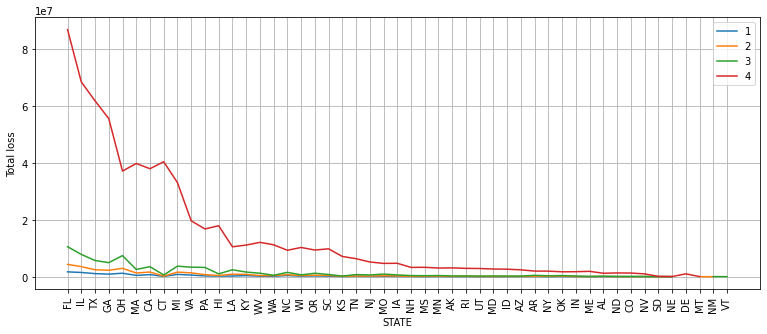

In [ ]:
plt.figure(figsize=(13, 5))
#INDEX=Table_total_loss['index1']
plt.plot(INDEX,Table_total_loss['1'])
plt.plot(INDEX,Table_total_loss['2'])
plt.plot(INDEX,Table_total_loss['3'])
plt.plot(INDEX,Table_total_loss['4'])
plt.xticks(INDEX,rotation=90)
plt.xlabel('STATE')
plt.ylabel('Total loss')
plt.legend(["1", "2",'3','4'], loc ="upper right")
plt.grid()
plt.show()

* Here, it can be seen that, the amount of loss is high in Florida for all kinds of loss.

###The Top 5 States that had fires


In [ ]:
df5_most_fires=df5[(df5['INC_TYPE']>=100) & (df5['INC_TYPE']<175)]

In [ ]:
df5_most_fires['STATE'].value_counts().head()

FL    3005
IL    2558
OH    2021
TX    1760
GA    1599
Name: STATE, dtype: int64

* Florida, Illinois, Ohio,Texas, Georgia are the top 5 states with Floride being the highest.

##Data Preparation

###Subseting columns for modeling

* 'INC_TYPE', 
* 'ALARMS'
* 'ACT_TAK1'
* 'SUP_APP'
* 'EMS_APP'
* 'OTH_APP'
* 'PROP_LOSS'
* 'PROP_VAL'
* 'CONT_VAL'
* 'FF_DEATH'
* 'FF_INJ'
* 'PROP_USE'

In [ ]:
df6=df5[['INC_TYPE','ALARMS','ACT_TAK1','SUP_APP','EMS_APP','OTH_APP','PROP_LOSS','PROP_VAL','CONT_VAL','FF_DEATH','FF_INJ','PROP_USE']]

### Data Dictionary

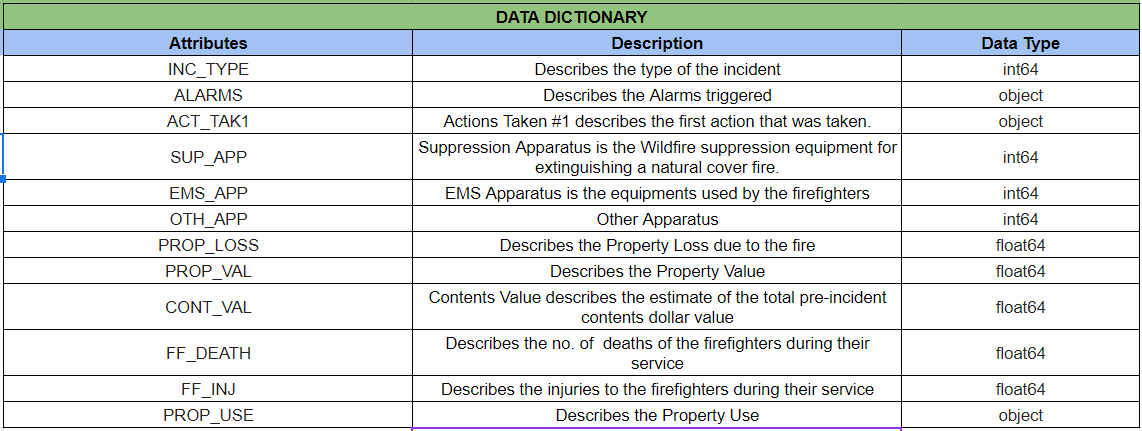

###Converting all columns to numeric

In [ ]:
cols = df6.columns
df6[cols] = df6[cols].apply(pd.to_numeric, errors='coerce')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df6.dtypes

INC_TYPE       int64
ALARMS       float64
ACT_TAK1     float64
SUP_APP        int64
EMS_APP        int64
OTH_APP        int64
PROP_LOSS    float64
PROP_VAL     float64
CONT_VAL     float64
FF_DEATH     float64
FF_INJ       float64
PROP_USE     float64
dtype: object

In [ ]:
df6.shape

(22351, 12)

###Droping NA rows

In [ ]:
df6.isnull().sum()

INC_TYPE        0
ALARMS       3604
ACT_TAK1        0
SUP_APP         0
EMS_APP         0
OTH_APP         0
PROP_LOSS       0
PROP_VAL        0
CONT_VAL     2744
FF_DEATH        1
FF_INJ          1
PROP_USE      197
dtype: int64

In [ ]:
df7=df6.drop(['PROP_LOSS'],axis=1)

### Label Encoding for categorical variables

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df7['INC_TYPE']= label_encoder.fit_transform(df7['INC_TYPE']) 
df7['ACT_TAK1']= label_encoder.fit_transform(df7['ACT_TAK1'])
df7['PROP_USE']= label_encoder.fit_transform(df7['PROP_USE']) 

In [ ]:
df7_1=df7.drop(['INC_TYPE','ACT_TAK1','PROP_USE'],axis=1)

* Scaling should be done before KNN imputation, because KNN imputation is based on the distances between the data points, which will not be of any use if they all the columns were not in same scale.

In [ ]:
# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df7_1), columns = df7_1.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

In [ ]:
df_knn_imputed[['INC_TYPE', 'ACT_TAK1','PROP_USE']] = df7[['INC_TYPE', 'ACT_TAK1','PROP_USE']].to_numpy()

In [ ]:
df_knn_imputed.head()

,ALARMS,SUP_APP,EMS_APP,OTH_APP,PROP_VAL,CONT_VAL,FF_DEATH,FF_INJ,INC_TYPE,ACT_TAK1,PROP_USE
0,0.034014,0.000577,0.0,0.0,0.000030,0.000000e+00,0.0,0.000000,15,50,131
1,0.034014,0.000577,0.0,0.0,0.000058,0.000000e+00,0.0,0.000000,15,50,131
2,0.040816,0.002309,0.0,0.0,0.000018,6.250000e-05,0.0,0.000000,2,2,57
3,0.047619,0.000577,0.0,0.0,0.000014,1.785714e-07,0.0,0.083333,15,2,130
4,0.047619,0.000577,0.0,0.0,0.000008,5.000000e-06,0.0,0.000000,15,1,78


In [ ]:
df_knn_imputed.isnull().sum()

ALARMS      0
SUP_APP     0
EMS_APP     0
OTH_APP     0
PROP_VAL    0
CONT_VAL    0
FF_DEATH    0
FF_INJ      0
INC_TYPE    0
ACT_TAK1    0
PROP_USE    0
dtype: int64

In [ ]:
df8=df_knn_imputed.copy()

In [ ]:
df8.columns

Index(['ALARMS', 'SUP_APP', 'EMS_APP', 'OTH_APP', 'PROP_VAL', 'CONT_VAL',
       'FF_DEATH', 'FF_INJ', 'INC_TYPE', 'ACT_TAK1', 'PROP_USE'],
      dtype='object')

## Modeling: Define $X$ and $y$
`y = 'PROP_LOSS'`

`X = all other columns!`

In [ ]:
y=np.log(df6['PROP_LOSS'])

In [ ]:
X=df8

In [ ]:
df_final=df8.copy()

In [ ]:
df_final['PROP_LOSS']=np.log(df6['PROP_LOSS']).to_numpy()

In [ ]:
df_final.shape

(22351, 12)

### Splitting data using an 80/20 random split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [ ]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

### Dropping categorical columns to transform the numerical columns

In [ ]:
X_train_1=X_train.drop(['INC_TYPE','ACT_TAK1','PROP_USE'],axis=1)

In [ ]:
X_test_1=X_test.drop(['INC_TYPE','ACT_TAK1','PROP_USE'],axis=1)

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_train_final = pt.fit_transform(X_train_1)
X_test_final=pt.transform(X_test_1)

In [ ]:
X_train_final=pd.DataFrame(X_train_final)

In [ ]:
X_test_final=pd.DataFrame(X_test_final)

### Histograms of numeric variables after imputing missing values and transforming them to make them normal

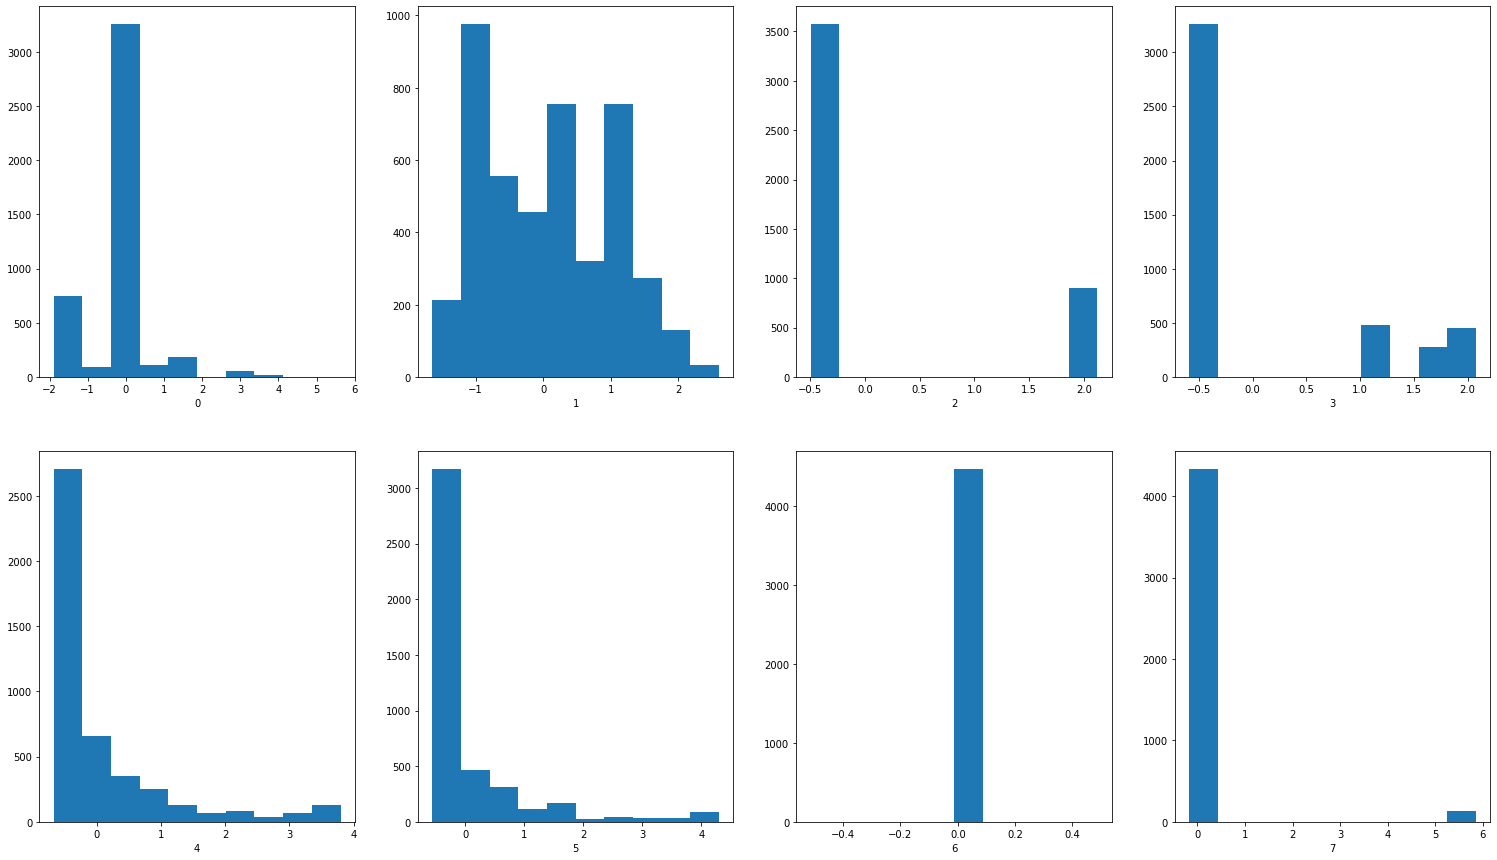

In [ ]:
plt.figure(figsize=(26, 15))
c=1
for i in X_test_final.columns:
  ax=plt.subplot(2,4,c)
  c=c+1
  ax.hist(X_test_final[i])
  plt.xlabel(i)

### Adding back categorical columns

In [ ]:
X_train_final[['INC_TYPE', 'ACT_TAK1','PROP_USE']] = X_train[['INC_TYPE', 'ACT_TAK1','PROP_USE']].to_numpy()

In [ ]:
X_test_final[['INC_TYPE', 'ACT_TAK1','PROP_USE']] = X_test[['INC_TYPE', 'ACT_TAK1','PROP_USE']].to_numpy()

In [ ]:
X_final=X_train_final.append(X_test_final, ignore_index=True)

In [ ]:
X_final.shape

(22351, 11)

###Check for Multicollinearity and make necessary corrections.

In [ ]:
corr=df_final.corr()

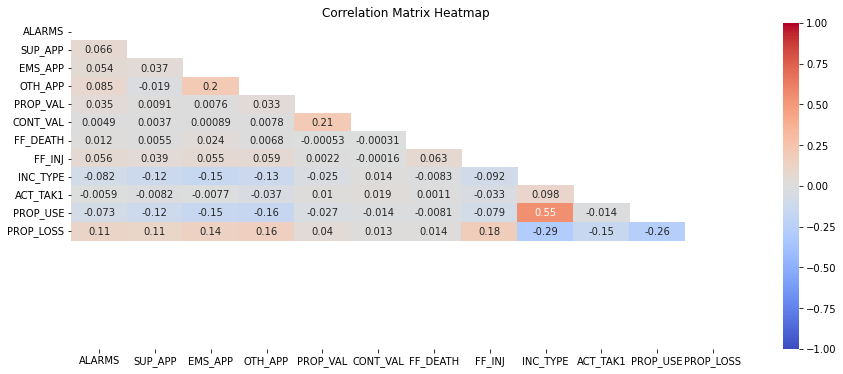

In [ ]:
mask = np.triu(df_final.corr())
plt.figure(figsize=(15,6))
sns.heatmap(df_final.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

* Here, we can see that there is no multicollinearity exists between any two variables and all of them are indepedent

In [ ]:
feat_names=X_train_final.columns[:]

VIF =[variance_inflation_factor(np.array(X_train_final), i) for i in range(np.array(X_train_final).shape[1])]
for idx, vif in enumerate(VIF):
    print('{0}: {1}'.format(feat_names[idx], vif))
    
# Printing Total Cases of Possible or Definite Multicollinearity

problem_multicollinearity = sum([1 for vif in VIF if vif > 5])
certain_multicollinearity = sum([1 for vif in VIF if vif > 10])
print()
print('{0} cases of Problematic Multicollinearity'.format(problem_multicollinearity))
print('{0} cases of Certain Multicollinearity'.format(certain_multicollinearity))
print()

0: 1.0368641459196737
1: 1.271053571152691
2: 1.1819528720427108
3: 1.2021263667687345
4: 2.003485097579115
5: 1.972788735528733
6: 1.0013706792642814
7: 1.0315901080435288
INC_TYPE: 3.2130094044386945
ACT_TAK1: 1.2937096197897162
PROP_USE: 3.002988415471245

0 cases of Problematic Multicollinearity
0 cases of Certain Multicollinearity



* Here, it can be seen that there are no Problematic and Certain cases of multicollinearity. All of the variables have vif value of less than 5.

### OLS Regression Model

In [ ]:
X_train_final = np.array(X_train_final)
X_test_final = np.array(X_test_final)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train_c = sm.add_constant(X_train_final)
X_test_c = sm.add_constant(X_test_final,has_constant='add')

In [ ]:
LR_statsmodels = sm.OLS(y_train, X_train_c).fit()
train_preds_sm = LR_statsmodels.predict(X_train_c)   
test_preds_sm = LR_statsmodels.predict(X_test_c)
print(LR_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     633.8
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:11:22   Log-Likelihood:                -27822.
No. Observations:               17880   AIC:                         5.567e+04
Df Residuals:                   17868   BIC:                         5.576e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3533      0.027    348.831      0.0

In [ ]:
df_results = pd.DataFrame({'train_y': y_train, 'train_preds': train_preds_sm})
df_results['Residuals'] = df_results['train_y'] - df_results['train_preds']
print(df_results.head())

    train_y  train_preds  Residuals
0  7.600902     8.665498  -1.064596
1  7.600902     8.876917  -1.276015
2  9.903488     9.161618   0.741869
3  7.600902     8.553139  -0.952237
4  9.615805     9.225399   0.390406


In [ ]:
from statsmodels.tools.eval_measures import rmse
train_rmse_sm=rmse(y_train,train_preds_sm)
test_rmse_sm = rmse(y_test, test_preds_sm)
print('rmse for train data is ', train_rmse_sm)
print('rmse for test data is ', test_rmse_sm)

rmse for train data is  1.1469524539223133
rmse for test data is  1.1847549502625299


### RIDGE MODEL

In [ ]:
ridgecv = RidgeCV(alphas=[0.0001,0.001, 0.01, 0.1, 0.5,1,10,100,1000])
ridgecv.fit(X_train_final, y_train)
optimal = ridgecv.alpha_
print("From the above Alpha values, we see that" ,optimal, "is the optimal.") 
print('R2 for train is', ridgecv.score(X_train_final,y_train))
print('R2 for test is', ridgecv.score(X_test_final,y_test))

From the above Alpha values, we see that 100.0 is the optimal.
R2 for train is 0.28066130219457386
R2 for test is 0.2634039565644213


In [ ]:
#Alpha=100
clf100 = Ridge(alpha=100)
clf100.fit(X_train_final, y_train)
ridge_train_preds=clf100.predict(X_train_final)
ridge_test_preds=clf100.predict(X_test_final)
print('R2 for train is',clf100.score(X_train_final, y_train))
print('R2 for test is',clf100.score(X_test_final, y_test))

R2 for train is 0.2806613021945734
R2 for test is 0.2634039565645596


In [ ]:
from statsmodels.tools.eval_measures import rmse
train_rmse_ridge=rmse(y_train,ridge_train_preds)
test_rmse_ridge = rmse(y_test, ridge_test_preds)
print('rmse for train data is ', train_rmse_ridge)
print('rmse for test data is ', test_rmse_ridge)

rmse for train data is  1.1469548269653231
rmse for test data is  1.1847518650005089


###LASSO MODEL

In [ ]:
lassocv = LassoCV(alphas=[0.0001,0.001, 0.01, 0.1, 0.5,1,10,100,1000])
lassocv.fit(X_train_final, y_train)
optimal = lassocv.alpha_
print("From the above Alpha values, we see that" ,optimal, "is the optimal.") 
print('R2 for train is', lassocv.score(X_train_final,y_train))
print('R2 for test is', lassocv.score(X_test_final,y_test))

From the above Alpha values, we see that 0.0001 is the optimal.
R2 for train is 0.28066424646186905
R2 for test is 0.2634041654168142


In [ ]:
# try alpha=0.0001
clf0001 = Lasso(alpha=0.0001)
clf0001.fit(X_train_final, y_train)
lasso_train_preds=clf0001.predict(X_train_final)
lasso_test_preds=clf0001.predict(X_test_final)
print('R2 for train is',clf0001.score(X_train_final, y_train))
print('R2 for test is',clf0001.score(X_test_final, y_test))

R2 for train is 0.28066424646186905
R2 for test is 0.2634041654168142


In [ ]:
from statsmodels.tools.eval_measures import rmse
train_rmse_lasso=rmse(y_train,lasso_train_preds)
test_rmse_lasso = rmse(y_test, lasso_test_preds)
print('rmse for train data is ', train_rmse_lasso)
print('rmse for test data is ', test_rmse_lasso)

rmse for train data is  1.1469524797087025
rmse for test data is  1.1847516970399843


* The r2 and rmse for all the three models are approximately same, the difference is only 1% and it is negligible.

* So, depending on the use case, either of the models can be chose for the prediction considering r2 and rmse.

###Evaluation:

* Here, for all the cases, the mean absolute error is more than median absolute error because mean might increase if there are outliers where as there will be no effect on the median even if there are some. 
* So, this means that there might be some outliers or extreme values like there might be times where the loss is too high. 
* Another case might be that the difference in actual and  prediction is high , then the absolute error will be more.  
* Because of these cases, the mean absolute error increases where as the median absolute error doesnot.

In [ ]:
from statsmodels.tools.eval_measures import meanabs
from statsmodels.tools.eval_measures import medianabs
print("OLS MODEL")
print("Train Partition:")
print("Mean Absolute Error for Train Set:",meanabs(y_train,train_preds_sm))
print("Median Absolute Error for Train Set:",medianabs(y_train,train_preds_sm))
print("Test Partition:")
print("Mean Absolute Error for Test Set:",meanabs(y_test,test_preds_sm))
print("Median Absolute Error for Test Set:",medianabs(y_test,test_preds_sm))

OLS MODEL
Train Partition:
Mean Absolute Error for Train Set: 0.9195016548110936
Median Absolute Error for Train Set: 0.7926384906839825
Test Partition:
Mean Absolute Error for Test Set: 0.9569079794790386
Median Absolute Error for Test Set: 0.8310688353458247


* Here, median absolute error is lower than mean absolute error for both train and test



In [ ]:
print("RIDGE MODEL")
print("Train Partition:")
print("Mean Absolute Error for Train Set:",meanabs(y_train,ridge_train_preds))
print("Median Absolute Error for Train Set:",medianabs(y_train,ridge_train_preds))
print("Test Partition:")
print("Mean Absolute Error for Test Set:",meanabs(y_test,ridge_test_preds))
print("Median Absolute Error for Test Set:",medianabs(y_test,ridge_test_preds))

RIDGE MODEL
Train Partition:
Mean Absolute Error for Train Set: 0.9196554709952339
Median Absolute Error for Train Set: 0.793410769752299
Test Partition:
Mean Absolute Error for Test Set: 0.9570947710312315
Median Absolute Error for Test Set: 0.8313608951650657


* Here, median absolute error is lower than mean absolute error for both train and test



In [ ]:
print("LASSO MODEL")
print("Train Partition:")
print("Mean Absolute Error for Train Set:",meanabs(y_train,lasso_train_preds))
print("Median Absolute Error for Train Set:",medianabs(y_train,lasso_train_preds))
print("Test Partition:")
print("Mean Absolute Error for Test Set:",meanabs(y_test,lasso_test_preds))
print("Median Absolute Error for Test Set:",medianabs(y_test,lasso_test_preds))

LASSO MODEL
Train Partition:
Mean Absolute Error for Train Set: 0.9195148191883139
Median Absolute Error for Train Set: 0.7927581412704381
Test Partition:
Mean Absolute Error for Test Set: 0.9569196916572669
Median Absolute Error for Test Set: 0.8316255224979852


* Here, median absolute error is lower than mean absolute error for both train and test

* The mean abosulte and median absolute error are also similar for all the models

###5 FOLD CROSS VALIDATION

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=42, shuffle=True)

####OLS MODEL
* Here, median absolute error is lower than mean absolute error for both train and test.

In [ ]:
model = LinearRegression()
scores = cross_val_score(model, X_final, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("The mean absolute error for ols model is:",np.mean(np.absolute(scores)))
print("The median absolute error for ols model is:",np.median(np.absolute(scores)))


The mean absolute error for ols model is: 1.1029460648577334
The median absolute error for ols model is: 1.0995753003488613


####RIDGE MODEL
* Here, median absolute error is lower than mean absolute error for both train and test.

In [ ]:
model = clf100 = Ridge(alpha=100)
scores = cross_val_score(model, X_final, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("The mean absolute error for ridge model is:",np.mean(np.absolute(scores)))
print("The median absolute error for ridge model is:",np.median(np.absolute(scores)))

The mean absolute error for ridge model is: 1.1029431898107838
The median absolute error for ridge model is: 1.0995689079819055


####LASSO
* Here, median absolute error is lower than mean absolute error for both train and test.

In [ ]:
model = clf0001 = Lasso(alpha=0.0001)
scores = cross_val_score(model, X_final, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("The mean absolute error for lasso model is:",np.mean(np.absolute(scores)))
print("The median absolute error for lasso model is:",np.median(np.absolute(scores)))

The mean absolute error for lasso model is: 1.1029409998911308
The median absolute error for lasso model is: 1.0995610457618994


* The mean and median aboslute error for 5 fold Cross Validation is more than  the OLS,ridge, and lasso models. So, those models are better than 5fold Cross Validation.

### Baseline Evaluation

Train Data:

In [ ]:
from statsmodels.tools.eval_measures import meanabs
from statsmodels.tools.eval_measures import medianabs
baseline_mean=np.mean(y_train)
print("The baseline mean ", baseline_mean)
MAE = meanabs(baseline_mean,y_train)
print("The mean absolute error is:", MAE)
MEAE= medianabs(baseline_mean,y_train)
print("The median absolute error is:", MEAE)


The baseline mean for OLS is: 9.165367724256493
The mean absolute error is: 0.5553705492574831
The median absolute error is: 0.484252979046885


Test Data:

In [ ]:
baseline_mean=np.mean(y_test)
print("The baseline mean for OLS is:", baseline_mean)
MAE = meanabs(baseline_mean,y_test)
print("The mean absolute error is:", MAE)
MEAE= medianabs(baseline_mean,y_test)
print("The median absolute error is:", MEAE)

The baseline mean for OLS is: 9.172504902393312
The mean absolute error is: 0.547594065882867
The median absolute error is: 0.48498939457888746


### Evaluation: Scatterplots of `x=Actual` and `y=Pred` for each model
* Here, np.log will be applied because log has been applied previously, now we are inverse transforming it.

####For Train

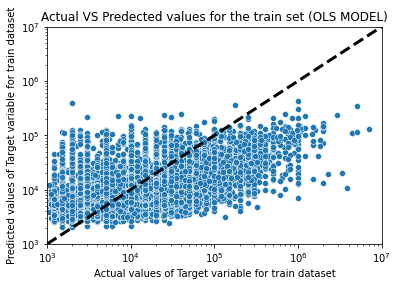

In [ ]:
sns.scatterplot(x=np.exp(y_train),y=np.exp(train_preds_sm))
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
plt.xscale( 'log' ) 
plt.yscale( 'log' ) 
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='k',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual values of Target variable for train dataset")
plt.ylabel("Predicted values of Target variable for train dataset")
plt.title("Actual VS Predected values for the train set (OLS MODEL)")
plt.show()

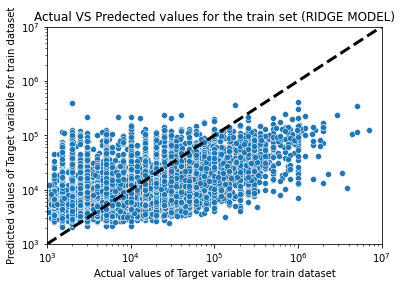

In [ ]:
sns.scatterplot(x=np.exp(y_train),y=np.exp(ridge_train_preds))
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
plt.xscale( 'log' ) 
plt.yscale( 'log' ) 
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='k',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual values of Target variable for train dataset")
plt.ylabel("Predicted values of Target variable for train dataset")
plt.title("Actual VS Predected values for the train set (RIDGE MODEL)")
plt.show()

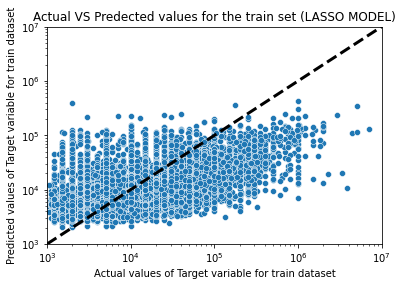

In [ ]:
sns.scatterplot(x=np.exp(y_train),y=np.exp(lasso_train_preds))
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
plt.xscale( 'log' ) 
plt.yscale( 'log' ) 
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='k',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual values of Target variable for train dataset")
plt.ylabel("Predicted values of Target variable for train dataset")
plt.title("Actual VS Predected values for the train set (LASSO MODEL)")
plt.show()

#### For Test

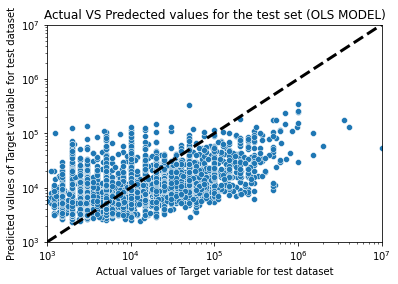

In [ ]:
sns.scatterplot(x=np.exp(y_test),y=np.exp(test_preds_sm))
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
plt.xscale( 'log' ) 
plt.yscale( 'log' ) 
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='k',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual values of Target variable for test dataset")
plt.ylabel("Predicted values of Target variable for test dataset")
plt.title("Actual VS Predected values for the test set (OLS MODEL)")
plt.show()

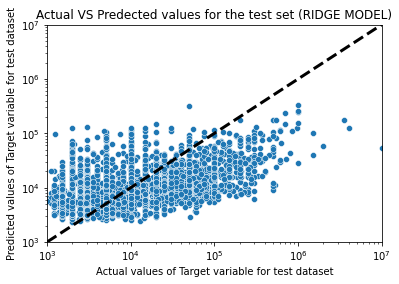

In [ ]:
sns.scatterplot(x=np.exp(y_test),y=np.exp(ridge_test_preds))
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
plt.xscale( 'log' ) 
plt.yscale( 'log' ) 
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='k',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual values of Target variable for test dataset")
plt.ylabel("Predicted values of Target variable for test dataset")
plt.title("Actual VS Predected values for the test set (RIDGE MODEL)")
plt.show()

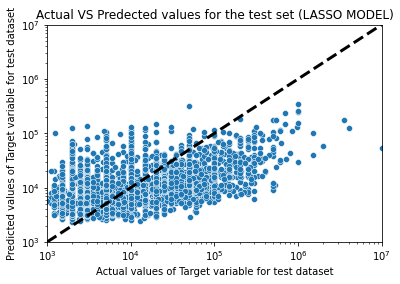

In [ ]:
sns.scatterplot(x=np.exp(y_test),y=np.exp(lasso_test_preds))
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
plt.xscale( 'log' ) 
plt.yscale( 'log' ) 
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='k',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual values of Target variable for test dataset")
plt.ylabel("Predicted values of Target variable for test dataset")
plt.title("Actual VS Predected values for the test set (LASSO MODEL)")
plt.show()

###Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor 
# for building the model

In [ ]:
model = RandomForestRegressor()
# Fitting the Random Forest Regression model to the data
model.fit(X_train_final, y_train)

RandomForestRegressor()

In [ ]:
# Predicting the target values of the test set
Rand_pred_train = model.predict(X_train_final)

# RMSE (Root Mean Square Error)
rmse_train = float(format(np.sqrt(mean_squared_error(y_train, Rand_pred_train)), '.3f'))
print("\nRMSE for train: ", rmse_train)


RMSE for train:  0.368


In [ ]:
# Predicting the target values of the test set
Rand_pred_test = model.predict(X_test_final)

# RMSE (Root Mean Square Error)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, Rand_pred_test)), '.3f'))
print("\nRMSE for test: ", rmse_test)


RMSE for test:  0.994


In [ ]:
r2_test = r2_score(y_test, Rand_pred_test)
r2_train = r2_score(y_train, Rand_pred_train)
print("\nR2 for train: ",r2_train)
print("\nR2 for train: ",r2_test)


R2 for train:  0.9259485482204483

R2 for train:  0.48197525547592


* Here, It can be seen that r2 for train is 92.59 and for test, it is 48.19. So, this model is over fit and cannot be used for real time unknown data.

#### Grid Search for finding the best parameters.

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Find the best parameters for the model
# parameters = {
#     'max_depth': [10,20,30],
#     'n_estimators': [5, 10, 20],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': [1, 2,10],
#  'min_samples_split': [ 1,2,5],
# }
# gridforest = GridSearchCV(model, parameters, cv = 5, n_jobs = -1, verbose = 1)
# gridforest.fit(X_train_final, y_train)
# gridforest.best_params_

In [ ]:
model = RandomForestRegressor(n_estimators = 10,max_depth= 13,max_features= 'sqrt', min_samples_leaf= 10,
 min_samples_split= 2,random_state = 45)
# Fitting the Random Forest Regression model to the data
model.fit(X_train_final, y_train)

RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=10, random_state=45)

In [ ]:
# Predicting the target values of the test set
Rand_pred_train = model.predict(X_train_final)

# RMSE (Root Mean Square Error)
rmse_train = float(format(np.sqrt(mean_squared_error(y_train, Rand_pred_train)), '.3f'))
print("\nRMSE for train: ", rmse_train)


RMSE for train:  0.872


In [ ]:
# Predicting the target values of the test set
Rand_pred_test = model.predict(X_test_final)

# RMSE (Root Mean Square Error)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, Rand_pred_test)), '.3f'))
print("\nRMSE for test: ", rmse_test)


RMSE for test:  0.957


In [ ]:
r2_test = r2_score(y_test, Rand_pred_test)
r2_train = r2_score(y_train, Rand_pred_train)
print("\nR2 for train: ",r2_train)
print("\nR2 for train: ",r2_test)


R2 for train:  0.5838828301798529

R2 for train:  0.5194740042119805


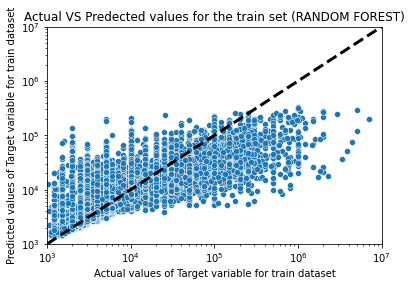

In [ ]:
sns.scatterplot(x=np.exp(y_train),y=np.exp(Rand_pred_train))
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
plt.xscale( 'log' ) 
plt.yscale( 'log' ) 
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='k',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual values of Target variable for train dataset")
plt.ylabel("Predicted values of Target variable for train dataset")
plt.title("Actual VS Predected values for the train set (RANDOM FOREST)")
plt.show()

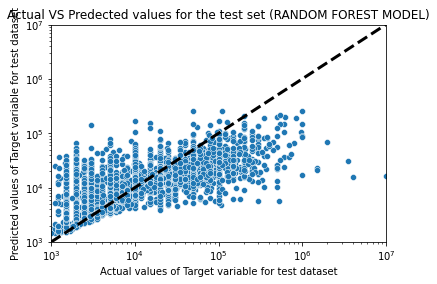

In [ ]:
sns.scatterplot(x=np.exp(y_test),y=np.exp(Rand_pred_test))
plt.xlim([1E3,1E7])
plt.ylim([1E3,1E7])
plt.xscale( 'log' ) 
plt.yscale( 'log' ) 
xpoints=ypoints=plt.xlim()
plt.plot(xpoints,ypoints,linestyle='--',color='k',lw=3,scalex=False,scaley=False)
plt.xlabel("Actual values of Target variable for test dataset")
plt.ylabel("Predicted values of Target variable for test dataset")
plt.title("Actual VS Predected values for the test set (RANDOM FOREST MODEL)")
plt.show()

#### 5 fold Cross Validation for Random Forest Model

In [ ]:
model = RandomForestRegressor(n_estimators = 10,max_depth= 13,max_features= 'sqrt', min_samples_leaf= 10,
 min_samples_split= 2,random_state = 45)
scores = cross_val_score(model, X_final, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
print("The mean absolute error for random forest is:",np.mean(np.absolute(scores)))
print("The median absolute error for random forest model is:",np.median(np.absolute(scores)))

The mean absolute error for random forest is: 1.1078232349113304
The median absolute error for random forest model is: 1.1006449926154567


* Random Forest Regressor has been done to check if it can improve r2 and decrease rmse. It did those two things but only for the training set. The rmse was 0.4 for train and 0.95 for test and r2 was 92 for train and 48 for test. So, it can be observed that the model is overfit for the training set. 

* So, we decided to tune the model and tried hyper parameter tuning for the same. The r2 has been reduced to 58 for train and increased to 52 for test. Rmse for train is 0.87 and for test is 0.95 which are lower than multiple linear regression model. So, it is clear this data better fits for random forest regressor.

* A lot of parameters have been tried with different values and found that these are the best parameters for this model.

* Parameters-
n_estimators = 10,
max_depth= 13,
max_features= 'sqrt',
min_samples_leaf= 10,
min_samples_split= 2
